# <Center> BIA 660 : Web-mining project  </Center>

### Chatbot Project

In [5]:
#Importing essential Libraries

import requests
from bs4 import BeautifulSoup  
from selenium import webdriver
import pandas as pd
import time
import re
import string
import numpy as np 
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import pos_tag
from nltk.chunk import ne_chunk
from nltk.collocations import *
from sklearn.preprocessing import normalize
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
import gensim
from gensim.models.phrases import Phrases, Phraser
import random
from matplotlib import pyplot as plt
import scipy
from warnings import filterwarnings
import nlpaug.augmenter.word as naw
import xgboost as xgb
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support,classification_report, roc_curve, auc,\
precision_recall_curve,plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import tree
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')


## Data Scraping

1. [Web Scraping](#Data-Collection-Web-Scraping)



# Data Collection Web Scraping

- We collect questions and answers from the FAQ of Stevens' website in several departments/issues by 5 functions.

In [ ]:
# Define a function called getFAQ that takes in two arguments, page_url and driver
def getFAQ(page_url, driver):
    # Initialize the result variable to None
    result = None
    # Use the driver to get the webpage at the specified URL
    driver.get(page_url)
    # Store the HTML code of the webpage in the page variable
    page = driver.page_source
    # Use BeautifulSoup to parse the HTML code
    soup = BeautifulSoup(page, 'html.parser')
    # Initialize empty lists 
    Questions = []
    Answers = []
    # Use soup.select to extract all elements with class name from website
    data_each = soup.select("div.accordion__item")
    # Loop through each element in data_each
    for each in data_each:
        question = each.select("div.accordion__button")
        Questions.append(question[0].get_text())
        answer = each.select("div.rich-text-base_c--rich-text-base__TWX_T")
        Answers.append(answer[0].get_text())
    # Combine Questions and Answers into a list called list_data
    list_data = [Questions, Answers]
    # Create a list of column names for the result DataFrame
    columns=['Questions','Answers']
    # Create a dictionary with keys from columns and values from list_data
    data_1 = dict(zip(columns,list_data))
    # Convert it into a pandas DataFrame called result
    result = pd.DataFrame(data_1)
    # Return the result DataFrame
    return result

In [ ]:
def getFAQ1(page_url, driver):
    result = None
# Load the web page
    driver.get(page_url)
# Get the page source and parse it with BeautifulSoup
    page = driver.page_source
    soup = BeautifulSoup(page, 'html.parser')
# Initialize empty lists 
    Questions = []
    Answers = []
    data_each = soup.select("div.rich-text-base_c--rich-text-base__TWX_T")
    tag_list = []
    ques_ans = []
# Loop through each div and its child tags
    for data in data_each:
        tag_name = data.children
        for tag in tag_name:
            # Append the text and tag name to separate lists
            ques_ans.append(tag.get_text())
            tag_list.append(tag.name)
            # If the tag is an h3 or h4, append the text to the Questions list
            if tag.name == "h4" or tag.name == "h3":
                Questions.append(tag.get_text())
# Remove the first tag if it doesn't contain a question
    index = 0        
    while index < len(ques_ans):
        if "?" not in ques_ans[0]:
            del ques_ans[0]
            del tag_list[0]
            index +=1
        else: 
            break
# Combine answers that are split across multiple tags
    i = 0
    while i < len(tag_list):
        if tag_list[i] == "p":
            new_str = ques_ans[i]
            i += 1
            while i < len(tag_list) and (tag_list[i] == "p" or tag_list[i] == "ul" or tag_list[i] == "ol"):
                new_str += ques_ans[i]
                i += 1
            Answers.append(new_str)
        else:
            i += 1
# Combine the Questions and Answers lists into a DataFrame
    list_data = [Questions, Answers]
    columns=['Questions','Answers']
    data_1 = dict(zip(columns,list_data))
    result = pd.DataFrame(data_1)
    return result


In [ ]:
def getFAQ2(page_url, driver):
    result = None
    driver.get(page_url)  # load the web pag
    page = driver.page_source  # get the HTML source of the pag
    soup = BeautifulSoup(page, 'html.parser')  # create a Beautiful_soup object to parse the html
    Questions = []
    Answers = []
# select all the div elemnts with class
    data_each = soup.select("div.rich-text-base_c--rich-text-base__TWX_T")
    tag_list = []  # list to store the tag names
    ques_ans = []  # list to store the text of each tag
    for data in data_each:
        tag_name = data.children
        for tag in tag_name:
            ques_ans.append(tag.get_text())
            tag_list.append(tag.name)
            # the h2 tag is also a question
            if tag.name == "h4" or tag.name == "h3" or tag.name == "h2":
                Questions.append(tag.get_text())
# remove the first tag if it is not a question
    index = 0        
    while index < len(ques_ans):
        if "?" not in ques_ans[0]:
            del ques_ans[0]
            del tag_list[0]
            index +=1
        else: 
            break
    i = 0
    while i < len(tag_list):
        if tag_list[i] == "p":
            new_str = ques_ans[i]
            i += 1
            while i < len(tag_list) and (tag_list[i] == "p" or tag_list[i] == "ul" or tag_list[i] == "ol"):
                new_str += ques_ans[i]
                i += 1
            Answers.append(new_str)
        else:
            i += 1

    list_data = [Questions, Answers]  # create a list with Questions and Answers
    columns=['Questions','Answers']  # create a list with the column names
    data_1 = dict(zip(columns,list_data))  # create a dictionary with column names as keys and list_data as values
    result = pd.DataFrame(data_1)  # create a dataframe from the dictionary
    
    return result  # return the dataframe as result


In [ ]:
def getFAQ3(page_url, driver):
    result = None
    driver.get(page_url)
    page = driver.page_source
    soup = BeautifulSoup(page, 'html.parser')
    
    Questions = []
    Answers = []

    data_each = soup.select("div.rich-text-base_c--rich-text-base__TWX_T")
 
    tag_list = []
    ques_ans = []
    for data in data_each:
        tag_name = data.children
        for tag in tag_name:
            tag_list.append(tag.name)
            ques_ans.append(tag.get_text())

    i = 0
    ques_ans_new=[]
    while i < len(tag_list):
        if tag_list[i] == "p":
            new_str = ques_ans[i]
            i += 1
            while i < len(tag_list) and (tag_list[i] == "ul" or tag_list[i] == "ol"):
                new_str += ques_ans[i]
                i += 1
            ques_ans_new.append(new_str)
        else:
            i += 1
    # to split Questions and Answers based on "A:" in each paragraph.
    new_list = [each.split("A:") for each in ques_ans_new]
    flat_list = [item for sublist in new_list for item in sublist if item != '']
    # to take the questions in the even positions and the answers in the odd positions.
    for index in range(len(flat_list)):
        if index%2!=0:
            Answers.append(flat_list[index])
        else:
            Questions.append(flat_list[index])

    list_data = [Questions, Answers]
    columns=['Questions','Answers']
    data_1 = dict(zip(columns,list_data))
    result = pd.DataFrame(data_1)
    
    return result

In [ ]:
def getFAQ4(page_url, driver):
    result = None
    driver.get(page_url)
    page = driver.page_source
    soup = BeautifulSoup(page, 'html.parser')
#inItialize
    Questions = []
    Answers = []
# Select all paragraphs since we cant get individual class and separate it later
    data_each = soup.select("div.rich-text-base_c--rich-text-base__TWX_T p")
    ques_ans = []
    for data in data_each:
        # Append each paragraph to ques_ans list
        ques_ans.append(data.get_text())
# Remove the first paragraph if it's not a question
    i = 0        
    while i < len(ques_ans):
        if "?" not in ques_ans[0]:
            del ques_ans[0]
            i+=1
        else: 
            ques_ans = ques_ans
            break
    new_variable = []    
    for each in ques_ans:
# If a paragraph ends with a question mark, add it to the Questions list and mark it with "q"
        if "?" in each:
            Questions.append(each)
            new_variable.append("q")
        # Otherwise mark it with "a"
        else:
            new_variable.append("a")
# Combine adjacent paragraphs marked with "a" into a single string answer
    j = 0
    while j < len(ques_ans):
        if new_variable[j] == "a":
            new_str = ques_ans[j]
            j += 1
            while j < len(ques_ans) and new_variable[j] == "a":
                new_str += ques_ans[j]
                j += 1
            Answers.append(new_str)
        else:
            j += 1
# Create a dictionary with Questions and Answers lists, then convert it to a pandas dataframe
    list_data = [Questions, Answers]
    columns=['Questions','Answers']
    data_1 = dict(zip(columns,list_data))
    result = pd.DataFrame(data_1)
    return result

The above Python function getFAQ, getFAQ1,getFAQ2,getFAQ3 and getFAQ4 extracts FAQs and their answers from a web page using BeautifulSoup and Selenium. It loops through the HTML tags, identifies the questions and answers, and combines the answers if they are split across multiple tags. It returns the results as a Pandas DataFrame.

In [ ]:
#Stevens URL links. This is data source. 
# We hit multiple sections of Stevens website to get data to build our chatbot to be able to answer different questions. This will serbe as our training set.
page_url0 = "https://www.stevens.edu/housing-dining-frequently-asked-questions"
page_url1 = "https://www.stevens.edu/opt-faqs"
page_url2 = "https://www.stevens.edu/admission-aid/tuition-financial-aid/frequently-asked-questions/frequently-asked-questions-financial-aid"
page_url3 = "https://www.stevens.edu/frequently-asked-questions-for-newly-admitted-students"
page_url4 = "https://www.stevens.edu/cpt-frequently-asked-questions"
page_url5 = "https://www.stevens.edu/change-of-program"
page_url6 = "https://www.stevens.edu/applying-for-a-social-security-number"
page_url7 = "https://www.stevens.edu/admission-aid/undergraduate-admissions/accepted-students/orientation"
page_url8 = "https://www.stevens.edu/stevens-online/frequently-asked-questions"
page_url9 = "https://www.stevens.edu/admission-aid/undergraduate-admissions/accepted-students/pre-orientation"
page_url10 = "https://www.stevens.edu/counseling-pshychological-services/about-student-counseling-and-psychological-services"
page_url11 = "https://www.stevens.edu/development-alumni-engagement/give-to-stevens/giving-faq"
page_url12 = "https://www.stevens.edu/interlibrary-loan-and-document-delivery-services/interlibrary-loan-and-document-delivery-services-faqs"
page_url13 = "https://www.stevens.edu/services/stevens-wi-fi"
page_url14 = "https://www.stevens.edu/page-basic/innovation-expo-2023-tools"
page_url15 = "https://www.stevens.edu/admission-aid/undergraduate-admissions/transfer-students"
page_url16 = "https://www.stevens.edu/counseling-pshychological-services/seeking-help-off-campus"
page_url17 = "https://www.stevens.edu/office-of-student-accounts/1098-t-tuition-statement-information"
page_url18 = "https://www.stevens.edu/school-systems-enterprises-graduate-program-faqs"
page_url19 = "https://www.stevens.edu/school-systems-enterprises-undergraduate-program-faqs"
page_url20 = "https://www.stevens.edu/istem/faq"
page_url21 = "https://www.stevens.edu/governance-and-policy/european-union-general-data-protection-regulation-gdpr-faq"
page_url22 = "https://www.stevens.edu/hr/workday-faqs"
page_url23 = "https://www.stevens.edu/disability-services/faq"

#We are using Chromedriver
executable_path = '/usr/bin/chromedriver'
driver = webdriver.Chrome(executable_path=executable_path)

result0 = getFAQ(page_url0, driver)
result1 = getFAQ(page_url1, driver)
result2 = getFAQ(page_url2, driver)
result3 = getFAQ(page_url3, driver)
result4 = getFAQ(page_url4, driver)
result5 = getFAQ(page_url5, driver)
result6 = getFAQ(page_url6, driver)
result7 = getFAQ(page_url7, driver)
result8 = getFAQ(page_url8, driver)
result9 = getFAQ(page_url9, driver)
result10 = getFAQ(page_url10, driver)
result11 = getFAQ(page_url11, driver)
result12 = getFAQ(page_url12, driver)
result13 = getFAQ(page_url13, driver)
result14 = getFAQ(page_url14, driver)
result15 = getFAQ(page_url15, driver)
result16 = getFAQ(page_url16, driver)
result17 = getFAQ(page_url17, driver)
result18 = getFAQ1(page_url18, driver)
result19 = getFAQ1(page_url19, driver)
result20 = getFAQ1(page_url20, driver)
result21 = getFAQ2(page_url21, driver)
result22 = getFAQ3(page_url22, driver)
result23 = getFAQ4(page_url23, driver)
driver.quit()


- Adding the name of the category to each link scraping data, using the "Category" attribute.

In [ ]:
#For better understanding we allot the relevant name to the categories of the scraped data 
result0.insert(0, "Category", "Housing and Dining")
result1.insert(0, "Category", "OPT")
result2.insert(0, "Category", "Tuition Financial Aid")
result3.insert(0, "Category", "Newly Admitted Students")
result4.insert(0, "Category", "CPT")
result5.insert(0, "Category", "Change of Program")
result6.insert(0, "Category", "Applying for a Social Security Number")
result7.insert(0, "Category", "New Student Orientation")
result8.insert(0, "Category", "Online Programs")
result9.insert(0, "Category", "New Student Pre-Orientation")
result10.insert(0, "Category", "Counseling and Psychological Services CAPS")
result11.insert(0, "Category", "Giving")
result12.insert(0, "Category", "Interlibrary Loan and Document Delivery Services")
result13.insert(0, "Category", "Stevens Wi-Fi")
result14.insert(0, "Category", "Innovation Expo")
result15.insert(0, "Category", "Transfer Applicant")
result16.insert(0, "Category", "Seeking Help Off-Campus")
result17.insert(0, "Category", "1098-T Tuition Statement")
result18.insert(0, "Category", "Enterprises Graduate Program")
result19.insert(0, "Category", "Enterprises Undergraduate Program")
result20.insert(0, "Category", "iSTEM@Stevens")
result21.insert(0, "Category", "GDPR")
result22.insert(0, "Category", "Workday")
result23.insert(0, "Category", "Disability Services")

#Combining above
Collect_list = [globals()["result"+str(i)] for i in range(24)]
dataset = pd.concat(Collect_list).reset_index(drop=True)

In [ ]:
#Save in CSV format
dataset.to_csv("Dataset_Scraping.csv", index=False)

In [3]:
#Creating the new dataset including Duplicated Questions.
dataset = pd.read_csv("Dataset_Scraping.csv")
dataset.reset_index(drop=True)

,Category,Questions,Answers
0,Housing and Dining,When will students find out about their housin...,Returning students (all students other than ne...
1,Housing and Dining,How long are the beds? What kind of sheets wil...,All the beds in the residence halls are xl twi...
2,Housing and Dining,Are pets allowed?,No. With the exception of documented service a...
3,Housing and Dining,Can I bunk my bed?,"Yes, our beds are designed to be bunked. If yo..."
4,Housing and Dining,Can furniture be removed from the room and rep...,"No, the furniture provided may not be removed ..."
...,...,...,...
328,Disability Services,If a student is accustomed to being accompanie...,"Stevens, like most other universities, does no..."
329,Disability Services,How are Accommodations determined?,Accommodations are developed for students on a...
330,Disability Services,If my accommodations for a course were sent to...,You should notify the ODS (disabilityservices@...
331,Disability Services,Since I am not sure where all my classes are l...,"Yes, the ODS is happy to provide campus walkth..."


# Data pre-processing:

Take the datasets after using functions to augment the dataset

In [ ]:
aug_data = pd.DataFrame(columns=data.columns)

def delete_word(sentence):
    words = nltk.word_tokenize(sentence)  
    index = random.randint(0, len(words)-1)
    words.pop(index)
    return ' '.join(words)


#     # delete a random word in the question
new_question = delete_word(row["Questions"])
aug_data = aug_data.append({"Category": row["Category"], \
                            "Questions": new_question, "Answers": row["Answers"]}, ignore_index=True)


aug_data.to_csv("Delete_word.csv", index=False)

# create an empty dataframe to store the augmented data
aug_data = pd.DataFrame(columns=data.columns)

def insert_word(sentence):
    words = nltk.word_tokenize(sentence)
    index = random.randint(0, len(words)-1)
    word = replace_word(words[index])
    words.insert(index, word)
    return ' '.join(words)

# loop through each row in the dataset and apply the data augmentation techniques
for index, row in data.iterrows():
    # insert a random word in the question
    new_question = insert_word(row["Questions"])
    aug_data = aug_data.append({"Category": row["Category"], "Questions": new_question, "Answers": row["Answers"]}, ignore_index=True)
    
# save the augmented data to a CSV file
aug_data.to_csv("Insert_word.csv", index=False)


def replace_word(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    if synonyms:
        return random.choice(synonyms)
    else:
        return word

    # replace words in the question
    new_question = replace_word(row["Questions"])
    aug_data = aug_data.append({"Category": row["Category"], "Questions": new_question, "Answers": row["Answers"]}, ignore_index=True)
  
    
aug_data.to_csv("Replace_word.csv", index=False)


In [4]:
data1=pd.read_csv("Replace_letter.csv")
data2=pd.read_csv("Insert_letter.csv")
data3=pd.read_csv("Delete_word.csv")

- Creating the new pairs of the question and answer.

The code below aims to increase the diversity of the original question-answering dataset by generating new samples with slightly different wordings, as well as by including incorrect answers. This can help to improve the robustness of machine learning models trained on the dataset.

In [5]:
Category_feature = list(dataset["Category"])*4
Question_feature = list(dataset["Questions"]) + list(data1["Questions"]) \
+ list(data2["Questions"])+list(data3["Questions"])

clustering_data = pd.DataFrame({"Category": Category_feature,
                         "Questions":Question_feature})
clustering_data = clustering_data.dropna()
clustering_data

,Category,Questions
0,Housing and Dining,When will students find out about their housin...
1,Housing and Dining,How long are the beds? What kind of sheets wil...
2,Housing and Dining,Are pets allowed?
3,Housing and Dining,Can I bunk my bed?
4,Housing and Dining,Can furniture be removed from the room and rep...
...,...,...
1327,Disability Services,If a student is accustomed to being accompanie...
1328,Disability Services,How are Accommodations determined
1329,Disability Services,If my accommodations for a course were sent to...
1330,Disability Services,Since I am not where all my classes are locate...


# Encoding
- The LabelEncoder function is used to transform categorical variables into numerical labels. It assigns a unique integer to each category in the column, with the first category being assigned the label 0, the second category being assigned the label 1, and so on.
- The purpose of encoding categorical variables with numerical labels is to prepare the data for machine learning algorithms that cannot handle categorical variables directly. By encoding the categories as numerical labels, the machine learning algorithm can use the information in the Category column to make predictions.

In [6]:
encoder = LabelEncoder()
clustering_data['Category'] = encoder.fit_transform(clustering_data['Category'])
clustering_data

,Category,Questions
0,10,When will students find out about their housin...
1,10,How long are the beds? What kind of sheets wil...
2,10,Are pets allowed?
3,10,Can I bunk my bed?
4,10,Can furniture be removed from the room and rep...
...,...,...
1327,5,If a student is accustomed to being accompanie...
1328,5,How are Accommodations determined
1329,5,If my accommodations for a course were sent to...
1330,5,Since I am not where all my classes are locate...


In [7]:
name_cate = dict(zip(clustering_data['Category'],encoder.inverse_transform\
                     (clustering_data['Category'])))
name_cate

{10: 'Housing and Dining',
 16: 'OPT',
 21: 'Tuition Financial Aid',
 15: 'Newly Admitted Students',
 2: 'CPT',
 3: 'Change of Program',
 1: 'Applying for a Social Security Number',
 13: 'New Student Orientation',
 17: 'Online Programs',
 14: 'New Student Pre-Orientation',
 4: 'Counseling and Psychological Services CAPS',
 9: 'Giving',
 12: 'Interlibrary Loan and Document Delivery Services',
 19: 'Stevens Wi-Fi',
 11: 'Innovation Expo',
 20: 'Transfer Applicant',
 18: 'Seeking Help Off-Campus',
 0: '1098-T Tuition Statement',
 6: 'Enterprises Graduate Program',
 7: 'Enterprises Undergraduate Program',
 23: 'iSTEM@Stevens',
 8: 'GDPR',
 22: 'Workday',
 5: 'Disability Services'}

- Create the dataset to predict the question and answer is paired or not. 

In [8]:
random.seed(1000)
C_new = []
Q_new = []
Q_1_new = []
Q_2_new = []
Q_3_new = []
A_new = []
A_1_new = []
A_2_new = []
A_3_new = []
output = []
number_sample = 1000
number_que =  number_sample/len(dataset["Answers"])

for i in range(len(dataset["Questions"])):
    index = 0
    for j in range(int(number_que)):
        # To take the pair of question and answer
        if index == 0:
            C_new.append(dataset["Category"][i])
            Q_new.append(dataset["Questions"][i])
            Q_1_new.append(data1["Questions"][i])
            Q_2_new.append(data2["Questions"][i])
            Q_3_new.append(data3["Questions"][i])
            A_new.append(dataset["Answers"][i])
            A_1_new.append(data1["Answers"][i])
            A_2_new.append(data2["Answers"][i])
            A_3_new.append(data3["Answers"][i])
            output.append(1)
        # to take 2 answers randomly for each question
        else:
            my_list = list(range(len(dataset["Answers"])))
            random_number = random.choice(my_list)
            while dataset["Category"][random_number] == dataset["Category"][i]:
                random_number = random.choice(my_list)
            C_new.append(dataset["Category"][i])
            Q_new.append(dataset["Questions"][i])
            Q_1_new.append(data1["Questions"][i])
            Q_2_new.append(data2["Questions"][i])
            Q_3_new.append(data3["Questions"][i])
            A_new.append(dataset["Answers"][random_number])
            A_1_new.append(data1["Answers"][random_number])
            A_2_new.append(data2["Answers"][random_number])
            A_3_new.append(data3["Answers"][random_number])
            output.append(0)
        index +=1

Category = C_new*4
Questions = Q_new + Q_1_new + Q_2_new + Q_3_new
Answers = A_new + A_2_new + A_3_new + A_1_new 
Label = output*4

new_data = pd.DataFrame({"Category": Category,
                         "Questions":Questions,
                         "Answers": Answers,
                       "Label": Label})
new_data = new_data.dropna()
new_data   

,Category,Questions,Answers,Label
0,Housing and Dining,When will students find out about their housin...,Returning students (all students other than ne...,1
1,Housing and Dining,When will students find out about their housin...,Navigating the process of obtaining health ins...,0
2,Housing and Dining,When will students find out about their housin...,"No, you cannot enroll in a degree-seeking prog...",0
3,Housing and Dining,How long are the beds? What kind of sheets wil...,All the beds in the residence halls are xl twi...,1
4,Housing and Dining,How long are the beds? What kind of sheets wil...,"Registration is NOT required, but setting up l...",0
...,...,...,...,...
3991,Disability Services,Since I am not where all my classes are locate...,Commencement takes place only once each academ...,0
3992,Disability Services,Since I am not where all my classes are locate...,The Stevens tax ID number ds 22-1487354 .,0
3993,Disability Services,Can I request additional time with a if I feel...,"Yes , students registered with the ODS can con...",1
3994,Disability Services,Can I request additional time with a if I feel...,Stevens offers online courses in a variety of ...,0


# Tokenize
- Tokenize questions and answers following options:
  - Lemmatizing.
  - Stopwork.
  - Tokenize by unigrams and bigrams.
- This function named tokenize tokenizes text documents. The function takes four parameters:

In [9]:
# Define function named `tokenize` that takes a list of documents and optional parameters
def tokenize(docs, lemmatized=True, remove_stopword=True, bigram=True):
    # Initialize an empty list
    tokenized_docs = []
    # Loop through each document in the list of documents
    for doc in docs:
        # Define a regex
        pattern=r'\w[\w\',-]*\w'                        
        tokens=nltk.regexp_tokenize(doc, pattern)
        # Convert all tokens to lowercase 
        tokens_list = list(map(str.lower,tokens))
        # Generate bigrams from the tokens using Gensim's `Phrases` and `Phraser` classes, if `bigram` is True
        if bigram==True: 
            phrases = Phrases([tokens_list], min_count=2, threshold=0.8, \
                          scoring='npmi')
            bigram = Phraser(phrases)
            text = ' '.join(tokens_list)
            tokens_list = bigram[text.split()]
        # Lemmatize the tokens using NLTK's `WordNetLemmatizer` class, if `lemmatized` is True
        if lemmatized==True:
            lemma = WordNetLemmatizer()
            lem = map(lemma.lemmatize, tokens_list)
            tokens_list = list(lem)
        # Remove stop words from the tokens using NLTK's `stopwords.words()` function, if `remove_stopword` is True
        if remove_stopword==True:
            tokens_list = [word for word in tokens_list if not word in stopwords.words("english")]
        # Append the list of tokens to `tokenized_docs`
        tokenized_docs.append(tokens_list)
            
    # Return the list of tokenized documents
    return tokenized_docs

# Assess Similarity
- The assess_similarity function takes two lists of tokenized text (questions and answers), and computes the cosine similarity between each question-answer pair. It then returns a DataFrame containing the similarity score for each pair.
- The function first combines the questions and answers into a single corpus, and then computes the tf-idf vector representation for each question-answer pair. It then computes the cosine similarity between the tf-idf vectors of each question-answer pair, and returns a DataFrame with the similarity score for each pair.


In [11]:
def assess_similarity(question_tokens, answer_tokens, pair_QA, label_feature = None):
    # Initialize variables
    result = None
    number = len(question_tokens)
    # Combine question and answer tokens to create a corpus
    corpus = question_tokens + answer_tokens
    # Calculate the TF-IDF score for the corpus
    tfidf_vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
    tf_idf_corpus = tfidf_vectorizer.fit_transform(corpus)
    # Split the TF-IDF score matrix into question and answer matrices
    tf_idf_ques = tf_idf_corpus[:number,:]
    tf_idf_ans = tf_idf_corpus[number:,:]
    # Initialize an empty list to store similarity scores
    simi_que_ans = []
    # Calculate cosine similarity between each question and answer pair
    for i in range(number):
        each_ans = tf_idf_ans[i].reshape(1, -1)
        each_ques = tf_idf_ques[i].reshape(1, -1)
        each_simi = cosine_similarity(each_ques, each_ans)[0][0]
        simi_que_ans.append(each_simi)
    # Create a DataFrame to store similarity scores and pair of questions and answers
    if label_feature:
        result = pd.DataFrame({
            "question_anwser_sim": simi_que_ans,
            "Pair QA": pair_QA})
    else:
        result = pd.DataFrame({
            "question_anwser_sim": simi_que_ans})
    return result


## We try Different Parameters to see the difference of the similariity among situations

In [41]:
question_tokens = tokenize(new_data["Questions"],lemmatized=True, remove_stopword=True, bigram = True)
answer_tokens = tokenize(new_data["Answers"], lemmatized=True, remove_stopword=True, bigram = True)
pair_QA = new_data["Label"]

result_train = assess_similarity(question_tokens, answer_tokens, pair_QA, label_feature = True)
result_train.head(10)

,question_anwser_sim,Pair QA
0,0.173626,1
1,0.000000,0
2,0.039854,0
3,0.419749,1
4,0.000000,0
5,0.000000,0
6,0.323395,1
7,0.000000,0
8,0.000000,0
9,0.233357,1


In [42]:
question_tokens = tokenize(new_data["Questions"],lemmatized=False, remove_stopword=False, bigram = False)
answer_tokens = tokenize(new_data["Answers"], lemmatized=False, remove_stopword=False, bigram = False)
pair_QA = new_data["Label"]

result_train = assess_similarity(question_tokens, answer_tokens, pair_QA, label_feature = True)
result_train.head(10)

,question_anwser_sim,Pair QA
0,0.163656,1
1,0.038022,0
2,0.057920,0
3,0.371167,1
4,0.029629,0
5,0.016647,0
6,0.328212,1
7,0.000000,0
8,0.019125,0
9,0.108566,1


- From observation, we see each case showing the tradeoff, the question is higher in this case and lower in the other case, and vice versa.

# Train the model to predict the Category for Question
- Using the cross_val_score() with 10-fold to evaluate the best model in 3 models: Decision Tree, Random Forest, and Logistic Regression for the single label classification problem.

In [12]:
train, test = train_test_split(clustering_data, test_size=0.2, random_state=0)
train_X = tokenize(train["Questions"], lemmatized=True, remove_stopword=True, bigram=True)
test_X = tokenize(test["Questions"], lemmatized=True, remove_stopword=True, bigram=True)
def identity_tokenizer(text):
    return text
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)    
xtrain = tfidf.fit_transform(train_X)
xtest = tfidf.transform(test_X)

model_tree = tree.DecisionTreeClassifier()
# Evaluate model performance using 10-fold cross-validation
scores_tree = cross_val_score(model_tree, xtrain, train["Category"], cv=10)

model_ran = RandomForestClassifier()
scores_ran = cross_val_score(model_ran, xtrain, train["Category"], cv=10)

model_log = LogisticRegression()
scores_log = cross_val_score(model_log, xtrain, train["Category"], cv=10)

# Print average accuracy and standard deviation of accuracy
print("Average accuracy for Decision Tree model: {:.2f}%".format(scores_tree.mean() * 100))
print("Standard deviation of accuracy: {:.2f}%".format(scores_tree.std() * 100))
print("--------------")
print("Average accuracy for Random Forest model: {:.2f}%".format(scores_ran.mean() * 100))
print("Standard deviation of accuracy: {:.2f}%".format(scores_ran.std() * 100))
print("--------------")
print("Average accuracy for Logistic Regression model: {:.2f}%".format(scores_log.mean() * 100))
print("Standard deviation of accuracy: {:.2f}%".format(scores_log.std() * 100))

Average accuracy for Decision Tree model: 86.57%
Standard deviation of accuracy: 4.45%
--------------
Average accuracy for Random Forest model: 90.61%
Standard deviation of accuracy: 3.35%
--------------
Average accuracy for Logistic Regression model: 85.54%
Standard deviation of accuracy: 2.95%


**=> In 3 models, we can see the Random Forest model show the highest average accuracy. We choose the Random Forest model to train the model**

In [13]:
model_ran.fit(xtrain, train["Category"])
y_pred = model_ran.predict(xtest)
print(classification_report(test["Category"], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        11
           5       1.00      0.93      0.96        14
           6       0.71      0.62      0.67        16
           7       0.62      0.67      0.65        15
           8       1.00      1.00      1.00         4
           9       0.80      1.00      0.89         4
          10       0.96      1.00      0.98        22
          11       1.00      0.89      0.94         9
          12       1.00      1.00      1.00         5
          13       1.00      0.80      0.89         5
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00        18
          17       1.00    

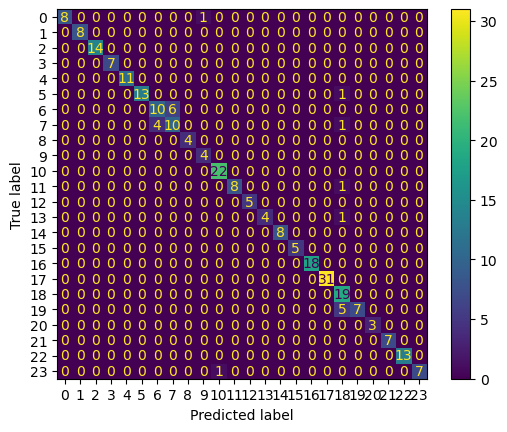

In [17]:
plot_confusion_matrix(model_ran,xtest, np.array(test["Category"]).reshape(-1, 1))

# Classification model:
- We build a classifier to identify whether the question and answer are paired.
- We use SVM algorithm to train with 2 methods:
  - **Method 1**: We just use one feature, the cosine similarity, to train.
  - **Method 1**: We use the TF-IDF matrix and the cosine similarity, to train.

In [18]:
train_data, test_data = train_test_split(new_data , test_size=0.2,\
                    random_state=42)
X_train = train_data[["Category","Questions","Answers"]]
Y_train = train_data["Label"]
X_test = test_data[["Category","Questions","Answers"]]
Y_test = test_data["Label"]

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       521
           1       0.91      0.79      0.85       279

    accuracy                           0.90       800
   macro avg       0.90      0.87      0.89       800
weighted avg       0.90      0.90      0.90       800

AUC: 91.67% , PRC: 92.25%


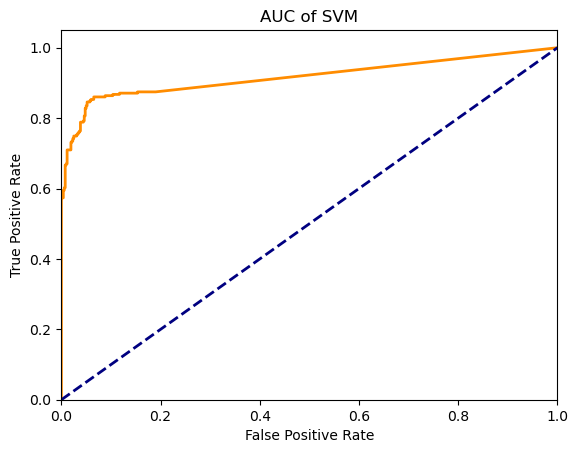

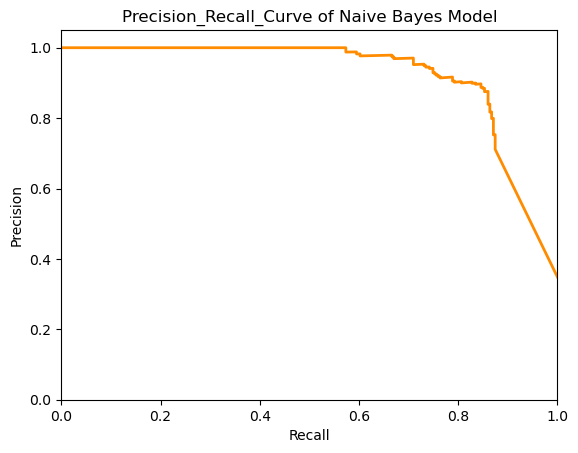

In [19]:
question_tokens = tokenize(X_train["Questions"],lemmatized=True, remove_stopword=True, bigram = True)
answer_tokens = tokenize(X_train["Answers"], lemmatized=True, remove_stopword=True, bigram = True)
result_train= assess_similarity(question_tokens, answer_tokens, pair_QA = None,label_feature = None)

question_tokens = tokenize(X_test["Questions"],lemmatized=True, remove_stopword=True, bigram = True)
answer_tokens = tokenize(X_test["Answers"], lemmatized=True, remove_stopword=True, bigram = True)
result_test= assess_similarity(question_tokens, answer_tokens, pair_QA = None,label_feature = None)


data_train = np.array(result_train["question_anwser_sim"]).reshape(-1,1)
data_test = np.array(result_test["question_anwser_sim"]).reshape(-1,1)

# to train SVM model with the cosine similarity
clf = svm.LinearSVC().fit(data_train, Y_train)
predict_p =clf.decision_function(data_test)
y_pred =clf.predict(data_test)
print(classification_report(Y_test, y_pred))


fpr, tpr, thresholds = roc_curve(Y_test, predict_p, pos_label=1)
precision, recall, thresholds = precision_recall_curve(Y_test, predict_p, pos_label=1)
print("AUC: {:.2%}".format(auc(fpr, tpr)),", PRC: {:.2%}".format(auc(recall, precision)))

plt.figure();
plt.plot(fpr, tpr, color='darkorange', lw=2);
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('AUC of SVM');
plt.show();



plt.figure();
plt.plot(recall, precision, color='darkorange', lw=2);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('Recall');
plt.ylabel('Precision');
plt.title('Precision_Recall_Curve of Naive Bayes Model');
plt.show();

The **identity_tokenizer()** function is used as the tokenizer argument for the TfidfVectorizer in scikit-learn. It is a simple function that takes a string as input and returns the same string as output.

In [20]:
def identity_tokenizer(text):
    return text

- Using Pipeline and GridSearchCV to find the best parameter for model in 2 situations bigram = True and bigram = False.

In [21]:
def tokenize1(docs, bigram=True):
    tokenized_docs = []
    for doc in docs:
        pattern=r'\w[\w\',-]*\w'                        
        tokens=nltk.regexp_tokenize(doc, pattern)
        tokens_list = list(map(str.lower,tokens))
        if bigram==True: 
            phrases = Phrases([tokens_list], min_count=2, threshold=0.8, \
                          scoring='npmi')
            bigram = Phraser(phrases)
            text = ' '.join(tokens_list)
            tokens_list = bigram[text.split()]

        tokenized_docs.append(' '.join(tokens_list))

    return tokenized_docs
def pipeline(x, y,bigram=True):

    text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', svm.LinearSVC(dual=False))
                   ])
    
    parameters = {
              'tfidf__stop_words':[None,"english"],
              'clf__penalty': ['l1', 'l2'],
}
    metric =  "f1_macro"
    
    gs_clf = GridSearchCV(text_clf, param_grid=parameters, \
                          scoring=metric, cv=5)
    if bigram:
        X_train = tokenize1(x["Questions"]+" "+x["Answers"], bigram=True)
    else:
        X_train = x["Questions"]+" "+x["Answers"]
    gs_clf = gs_clf.fit(X_train, y)
    for param_name in gs_clf.best_params_:
        print("{0}:\t{1}".format(param_name,\
                                     gs_clf.best_params_[param_name]))

    print("best f1 score: {:.3f}".format(gs_clf.best_score_))
    

In [22]:
print("The best parameter are: \n")
pipeline(X_train, Y_train,bigram=True)

The best parameter are: 

clf__penalty:	l2
tfidf__stop_words:	None
best f1 score: 0.522


In [23]:
print("The best parameter are: \n")
pipeline(X_train, Y_train,bigram=False)

The best parameter are: 

clf__penalty:	l2
tfidf__stop_words:	None
best f1 score: 0.522


**=> bigram does not affect**

- Put SVM model in a function can set 2 parameters such as remove_stopword and bigram.
- https://mmuratarat.github.io/2019-10-12/probabilistic-output-of-svm

In [24]:
def svm_model(X_train,Y_train,X_test,Y_test,remove_stopword=True,bigram = True):
    # set several situations with changing 2 parameters.
    if remove_stopword==True and bigram == False:
        question_tokens = tokenize(X_train["Questions"],lemmatized=True, remove_stopword=True, bigram = False)
        answer_tokens = tokenize(X_train["Answers"], lemmatized=True, remove_stopword=True, bigram = False)
        result_train= assess_similarity(question_tokens, answer_tokens, pair_QA = None,label_feature = None)

        question_tokens = tokenize(X_test["Questions"],lemmatized=True, remove_stopword=True, bigram = False)
        answer_tokens = tokenize(X_test["Answers"], lemmatized=True, remove_stopword=True, bigram = False)
        result_test= assess_similarity(question_tokens, answer_tokens, pair_QA = None,label_feature = None)
        
        
        # to tokenize the question and answer
        tokenized_train = tokenize(X_train["Questions"]+" "+X_train["Answers"],\
                                   lemmatized=True, remove_stopword=True, bigram = False)
        tokenized_test = tokenize(X_test["Questions"]+" "+X_test["Answers"],\
                                   lemmatized=True, remove_stopword=True, bigram = False)
    
    
    elif remove_stopword==True and bigram == True:
        question_tokens = tokenize(X_train["Questions"],lemmatized=True,\
                                   remove_stopword=True, bigram = True)
        answer_tokens = tokenize(X_train["Answers"], lemmatized=True, \
                                 remove_stopword=True, bigram = True)
        result_train= assess_similarity(question_tokens, answer_tokens,\
                                        pair_QA = None,label_feature = None)

        question_tokens = tokenize(X_test["Questions"],lemmatized=True,\
                                   remove_stopword=True, bigram = True)
        answer_tokens = tokenize(X_test["Answers"], lemmatized=True, \
                                 remove_stopword=True, bigram = True)
        result_test= assess_similarity(question_tokens, answer_tokens, \
                                       pair_QA = None,label_feature = None)
        
        tokenized_train = tokenize(X_train["Questions"]+" "+X_train["Answers"],\
                                   lemmatized=True, remove_stopword=True, bigram = True)
        tokenized_test = tokenize(X_test["Questions"]+" "+X_test["Answers"],\
                                   lemmatized=True, remove_stopword=True, bigram = True)
        
    elif remove_stopword==False and bigram == False:
        question_tokens = tokenize(X_train["Questions"],lemmatized=False,\
                                   remove_stopword=False, bigram = False)
        answer_tokens = tokenize(X_train["Answers"], lemmatized=False, \
                                 remove_stopword=False, bigram = False)
        result_train= assess_similarity(question_tokens, answer_tokens,\
                                        pair_QA = None,label_feature = None)

        question_tokens = tokenize(X_test["Questions"],lemmatized=False,\
                                   remove_stopword=False, bigram = False)
        answer_tokens = tokenize(X_test["Answers"], lemmatized=False, \
                                 remove_stopword=False, bigram = False)
        result_test= assess_similarity(question_tokens, answer_tokens, \
                                       pair_QA = None,label_feature = None)
        
        # to tokenize the question and answer
        tokenized_train = tokenize(X_train["Questions"]+" "+X_train["Answers"],\
                                   lemmatized=False, remove_stopword=False, bigram = False)
        tokenized_test = tokenize(X_test["Questions"]+" "+X_test["Answers"],\
                                   lemmatized=False, remove_stopword=False, bigram = False) 
      
    elif remove_stopword==False and bigram == True:
        question_tokens = tokenize(X_train["Questions"],lemmatized=False,\
                                   remove_stopword=False, bigram = True)
        answer_tokens = tokenize(X_train["Answers"], lemmatized=False, \
                                 remove_stopword=False, bigram = True)
        result_train= assess_similarity(question_tokens, answer_tokens,\
                                        pair_QA = None,label_feature = None)

        question_tokens = tokenize(X_test["Questions"],lemmatized=False,\
                                   remove_stopword=False, bigram = True)
        answer_tokens = tokenize(X_test["Answers"], lemmatized=False, \
                                 remove_stopword=False, bigram = True)
        result_test= assess_similarity(question_tokens, answer_tokens, \
                                       pair_QA = None,label_feature = None)
        
        # to tokenize the question and answer
        tokenized_train = tokenize(X_train["Questions"]+" "+X_train["Answers"],\
                                   lemmatized=False, remove_stopword=False, bigram = True)
        tokenized_test = tokenize(X_test["Questions"]+" "+X_test["Answers"],\
                                   lemmatized=False, remove_stopword=False, bigram = True)   
    # generate tfidf matrix
    tfidf_vector = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)    
    xtrain = tfidf_vector.fit_transform(tokenized_train)
    xtest = tfidf_vector.transform(tokenized_test)
    # to create the new dataset
    xtrain_new = scipy.sparse.hstack([xtrain,np.array(result_train["question_anwser_sim"]).reshape(-1,1)])
    xtest_new = scipy.sparse.hstack([xtest,np.array(result_test["question_anwser_sim"]).reshape(-1,1)])
    # train the SVM model
    model = svm.LinearSVC()
    clf = CalibratedClassifierCV(model).fit(xtrain_new, Y_train)
    # predict_p =clf.decision_function(xtest_new)
    predict_p =clf.predict_proba(xtest_new)[:,1]
    y_pred =clf.predict(xtest_new)

    print(classification_report(Y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(Y_test, predict_p, \
                                     pos_label=1)
    precision, recall, thresholds = precision_recall_curve(Y_test, predict_p, pos_label=1)
    # calculate auc and prc
    print("AUC: {:.2%}".format(auc(fpr, tpr)),", PRC: {:.2%}".format(auc(recall, precision)))


    plt.figure();
    plt.plot(fpr, tpr, color='darkorange', lw=2);
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--');
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate');
    plt.title('AUC of SVM');



    plt.figure();
    plt.plot(recall, precision, color='darkorange', lw=2);
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    plt.title('Precision_Recall_Curve of SVM');
    plt.show();
    
    return tfidf_vector, clf

Case 1: No remove stop-words

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       521
           1       0.90      0.85      0.88       279

    accuracy                           0.92       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.92      0.92      0.92       800

AUC: 96.62% , PRC: 95.41%


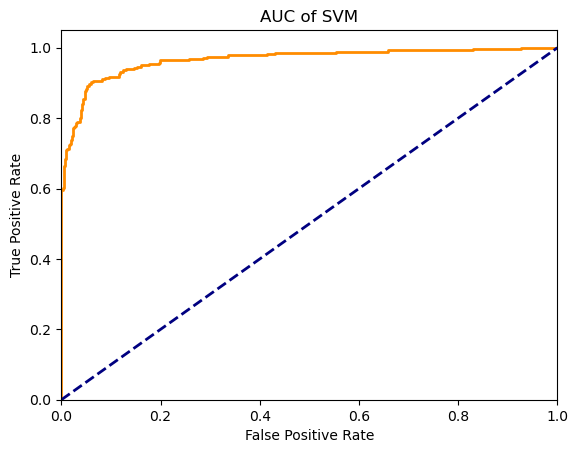

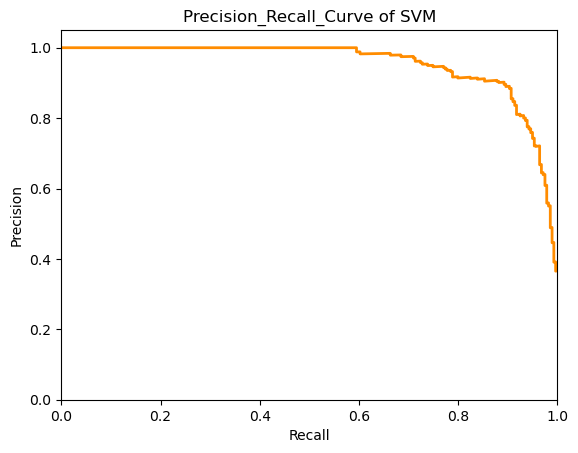

In [27]:
tfidf_vector,clf=svm_model(X_train,Y_train,X_test,Y_test,\
                           remove_stopword=False,bigram = False)

Case 2: Remove stop-words

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       521
           1       0.97      0.87      0.92       279

    accuracy                           0.94       800
   macro avg       0.95      0.93      0.94       800
weighted avg       0.95      0.94      0.94       800

AUC: 97.61% , PRC: 97.10%


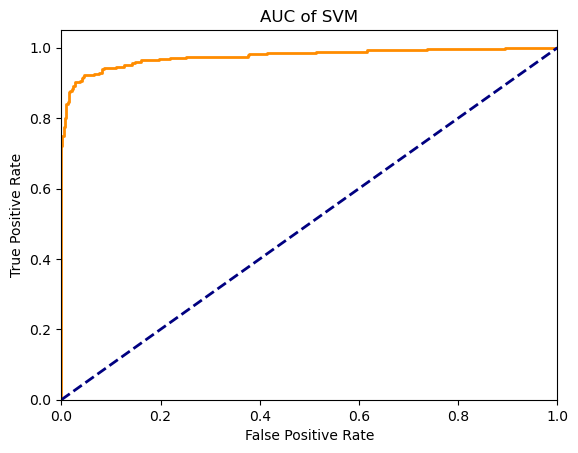

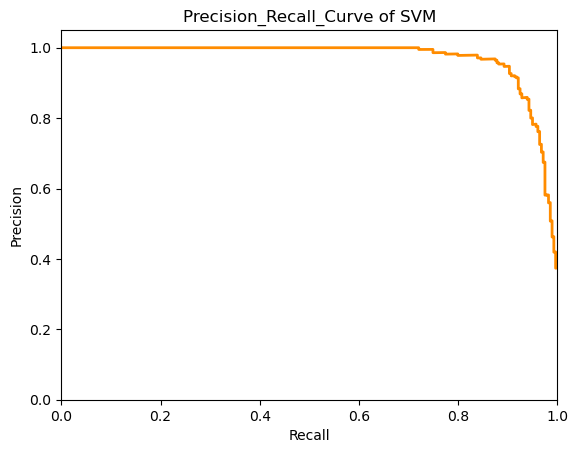

In [28]:
tfidf_vector_1,clf_1=svm_model(X_train,Y_train,X_test,Y_test,\
                           remove_stopword=True,bigram = False)

=> The results show the accuracy of the model removing stop-word better than no removing

## Retrieve document testing
- Create the new dataset to test the retrieve documents:
  - Take questions paraphrased from Question-dupliccate.csv
  - Pick randomly 100 questions.
  - The dataset includes 4 columns: Category, Question Collect, Question Chat GPT, and Answers

In [29]:
random.seed(100)
question_test = pd.read_csv("Question-dupliccate.csv")
Categories = []
Ques_collect = []
Ques_gpt = []
Ans_test = []
number_ques = 100
for i in range(number_ques):
    numbers = list(range(len(question_test)))
    random_number = random.choice(numbers)
    numbers.remove(random_number)
    Categories.append(dataset["Category"][random_number])
    Ques_collect.append(dataset["Questions"][random_number])
    Ques_gpt.append(question_test["Questions-duplicated"][random_number])
    Ans_test.append(dataset["Answers"][random_number])
final_dataset = pd.DataFrame({"Category":Categories,
                         "Question Collect": Ques_collect,
                             "Question Chat GPT": Ques_gpt,
                             "Answers": Ans_test})
final_dataset.head()

,Category,Question Collect,Question Chat GPT,Answers
0,CPT,What is the difference between CPT and OPT?,What are the differences between CPT and OPT?,"In short, CPT is employment that is directly r..."
1,Seeking Help Off-Campus,Is it really private and secure?,How secure and confidential is the service?,"Yes, we are HIPAA and FERPA compliant which me..."
2,Seeking Help Off-Campus,Can I continue working with my counselor once ...,Is it possible to continue working with my cou...,"Yes, you will have the option to continue work..."
3,CPT,My internship ended early. What documents shou...,How should I report an early end date for my i...,If your CPT employment is ending or ended prio...
4,Innovation Expo,Is registration required to attend?,Is registration mandatory for attending the Expo?,"Registration is NOT required, but setting up l..."


In [73]:
text = "How can I log in the Workday"
test_text = tokenize([text], lemmatized=True, remove_stopword=True, bigram=True)
test_text = tfidf.transform(test_text)
y_pred = model_ran.predict(test_text)
name_cate[y_pred[0]]

'Workday'

In [74]:
new_answer = list(dataset[dataset.Category == name_cate[y_pred[0]]]["Answers"])
new_ques = text*len(new_answer)
new_table = pd.DataFrame({"Questions":new_ques,
                         "Answers": new_answer})
new_table

,Questions,Answers
0,How can I log in the WorkdayHow can I log in t...,"Workday is a system for managing HR, Benefit,..."
1,How can I log in the WorkdayHow can I log in t...,"Just like Employee Self-Service, you can chan..."
2,How can I log in the WorkdayHow can I log in t...,"Any university employee including faculty, ot..."
3,How can I log in the WorkdayHow can I log in t...,Yes. Workday employs rigorous security measur...
4,How can I log in the WorkdayHow can I log in t...,Please visit my.stevens.edu to log in. Your u...
5,How can I log in the WorkdayHow can I log in t...,"Yes, Workday is a web-service that is accessi..."
6,How can I log in the WorkdayHow can I log in t...,"From the Workday home page, click on the Bene..."
7,How can I log in the WorkdayHow can I log in t...,For changes that do not require review and ap...
8,How can I log in the WorkdayHow can I log in t...,"To update personal information, please do the..."
9,How can I log in the WorkdayHow can I log in t...,Contact benefits@stevens.edu to determine if ...


In [75]:
question_new = tokenize(new_table["Questions"],lemmatized=False, remove_stopword=False, bigram = True)
answer_new = tokenize(new_table["Answers"], lemmatized=False, remove_stopword=False, bigram = True)
simi_new= assess_similarity(question_new, answer_new, pair_QA = None,label_feature = None)
tokenized_test = tokenize(new_table["Questions"]+new_table["Answers"],\
                           lemmatized=False, remove_stopword=False, bigram = True)
new_test = tfidf_vector.transform(tokenized_test)
new_model = scipy.sparse.hstack([new_test,np.array(simi_new["question_anwser_sim"]).reshape(-1,1)])
# distance = clf.decision_function(new_model)
pro = clf.predict_proba(new_model)
print(new_table["Answers"][pro[:,1].argsort()[::-1][:3]])

4     Please visit my.stevens.edu to log in. Your u...
3     Yes. Workday employs rigorous security measur...
1     Just like Employee Self-Service, you can chan...
Name: Answers, dtype: object


- **test_retrive()** funtions to return the accuracy of the retrieve document:
  - set parameters to return the accuracy for the top-1, top-3, and top-5 answers.
  - set for case 1 and case 2.

In [30]:
def test_retrive(questions, top =1,remove_stopword=False,bigram = False, change_para=True):
    score = [0]*len(questions)
    index = 0
    for text in questions:
        test_text = tokenize([text], lemmatized=True, remove_stopword=True, bigram=False)
        test_text = tfidf.transform(test_text)
        y_pred = model_ran.predict(test_text)
        new_answer = list(dataset[dataset.Category == name_cate[y_pred[0]]]["Answers"])
        new_ques = text*len(new_answer)
        new_table = pd.DataFrame({"Questions":new_ques,
                                 "Answers": new_answer})
        if remove_stopword==True and bigram == False:
            question_new = tokenize(new_table["Questions"],lemmatized=True,\
                                    remove_stopword=True, bigram = False)
            answer_new = tokenize(new_table["Answers"], lemmatized=True,\
                                  remove_stopword=True, bigram = False)
            simi_new= assess_similarity(question_new, answer_new, pair_QA = None,\
                                        label_feature = None)
            tokenized_test = tokenize(new_table["Questions"]+new_table["Answers"],\
                                       lemmatized=True, remove_stopword=True, bigram = False)
            
        elif remove_stopword==True and bigram == True:
            question_new = tokenize(new_table["Questions"],lemmatized=True,\
                                    remove_stopword=True, bigram = True)
            answer_new = tokenize(new_table["Answers"], lemmatized=True, \
                                  remove_stopword=True, bigram = True)
            simi_new= assess_similarity(question_new, answer_new, pair_QA = None,\
                                        label_feature = None)
            tokenized_test = tokenize(new_table["Questions"]+new_table["Answers"],\
                                       lemmatized=True, remove_stopword=True, bigram = True)
            
        elif remove_stopword==False and bigram == False:
            question_new = tokenize(new_table["Questions"],lemmatized=False,\
                                    remove_stopword=False, bigram = False)
            answer_new = tokenize(new_table["Answers"], lemmatized=False, \
                                  remove_stopword=False, bigram = False)
            simi_new= assess_similarity(question_new, answer_new, pair_QA = None,\
                                        label_feature = None)
            tokenized_test = tokenize(new_table["Questions"]+new_table["Answers"],\
                                       lemmatized=False, remove_stopword=False, bigram = False)
            
        if change_para:    
            new_test = tfidf_vector.transform(tokenized_test)
            new_model = scipy.sparse.hstack([new_test,np.array(simi_new["question_anwser_sim"]).reshape(-1,1)])
            pro = clf.predict_proba(new_model)
        else:
            new_test = tfidf_vector_1.transform(tokenized_test)
            new_model = scipy.sparse.hstack([new_test,np.array(simi_new["question_anwser_sim"]).reshape(-1,1)])
            pro = clf_1.predict_proba(new_model)
        
        if top==1:
            top_1 = new_table["Answers"][np.argmax(pro[:,1])]
            if final_dataset["Answers"][index] in [top_1]:
                score[index]=1
        elif top==3:
            top_3 = new_table["Answers"][pro[:,1].argsort()[::-1][:3]]
            if final_dataset["Answers"][index] in list(top_3):
                score[index]=1
        elif top==5:
            top_5 = new_table["Answers"][pro[:,1].argsort()[::-1][:5]]
            if final_dataset["Answers"][index] in list(top_5):
                score[index]=1  
        index += 1
    return score

In [31]:
score = test_retrive(final_dataset["Question Chat GPT"], top =1,\
             remove_stopword=False,bigram = False,change_para=True)
print("Accuracy for the top 1 is ", sum(score)/len(score)*100)

Accuracy for the top 1 is  41.0


In [32]:
score = test_retrive(final_dataset["Question Chat GPT"], top =3,\
            remove_stopword=False,bigram = False,change_para=True)
print("Accuracy for the top 3 is ", sum(score)/len(score)*100)

Accuracy for the top 3 is  64.0


In [33]:
score = test_retrive(final_dataset["Question Chat GPT"], top =5,\
            remove_stopword=False,bigram = False,change_para=True)
print("Accuracy for the top 5 is ", sum(score)/len(score)*100)

Accuracy for the top 5 is  76.0


In [34]:
score = test_retrive(final_dataset["Question Chat GPT"], top =1,\
             remove_stopword=True,bigram = False,change_para=False)
print("Accuracy for the top 1 is ", sum(score)/len(score)*100)

Accuracy for the top 1 is  48.0


In [35]:
score = test_retrive(final_dataset["Question Chat GPT"], top =3,\
            remove_stopword=True,bigram = False,change_para=False)
print("Accuracy for the top 3 is ", sum(score)/len(score)*100)

Accuracy for the top 3 is  67.0


In [36]:
score = test_retrive(final_dataset["Question Chat GPT"], top =5,\
            remove_stopword=True,bigram = False,change_para=False)
print("Accuracy for the top 5 is ", sum(score)/len(score)*100)

Accuracy for the top 5 is  75.0


## Visualize retrieve for a query
**retrive_doc()** function to retrieve the top-3 answers for a query 

In [37]:
def retrive_doc(text):
    test_text = tokenize([text], lemmatized=True, remove_stopword=True, bigram=True)
    test_text = tfidf.transform(test_text)
    y_pred = model_ran.predict(test_text)
    new_answer = list(dataset[dataset.Category == name_cate[y_pred[0]]]["Answers"])
    new_ques = text*len(new_answer)
    new_table = pd.DataFrame({"Questions":new_ques,
                             "Answers": new_answer})
    question_new = tokenize(new_table["Questions"],lemmatized=True, remove_stopword=True, bigram = False)
    answer_new = tokenize(new_table["Answers"], lemmatized=True, remove_stopword=True, bigram = False)
    simi_new= assess_similarity(question_new, answer_new, pair_QA = None,label_feature = None)
    tokenized_test = tokenize(new_table["Questions"]+new_table["Answers"],\
                               lemmatized=True, remove_stopword=True, bigram = False)
    new_test = tfidf_vector.transform(tokenized_test)
    new_model = scipy.sparse.hstack([new_test,np.array(simi_new["question_anwser_sim"]).reshape(-1,1)])
    # distance = clf.decision_function(new_model)
    pro = clf.predict_proba(new_model)
    top_3 = new_table["Answers"][pro[:,1].argsort()[::-1][:3]]
    for i in range(len(list(top_3))):
        print(f"{(i+1)}. {list(top_3)[i]}\n")
    

In [38]:
# try with retrive top-3 answers for question below
# If I have questions about Orientation, whom should I contact?
text = input("Hi, how can I help you?\n")
print("\n- The retrived doccuments:\n")
retrive_doc(text)

Hi, how can I help you?
 If I have questions about Orientation, whom should I contact?



- The retrived doccuments:

1. For all questions related to Orientation, please email student_life@stevens.edu 

2. Each student will receive information regarding new student arrival for Orientation in the summer. Residential Students: For residential students participating in Pre-Orientation, those students will move in on Thursday, August 24. Specific move-in times will be communicated closer to the date. For residential students not participating in Pre-Orientation, those students will move in on Sunday, August 27 when Orientation begins. Specific move-in times will be communicated closer to the date.Commuter Students: For commuter students participating in Pre-Orientation, those students will arrive when their program begins on Thursday, August 24. Please note that there are not on-campus accommodations for commuter students during Pre-Orientation. It is expected that students will travel to/from campus each day during Pre-Orientation. For commuter students not participating, tho

# Conclusion

- After evaluating the initial models, it appears that combining the TF-IDF matrix with cosine similarity to train an SVM model is a better approach to identify paired questions and answers. The F1 score achieved using this method is higher than the F1 score achieved using method 1.
- Overall, removing stop-words indicates better performance in detecting class 1 (positive) instances and has higher overall model performance.

=> Case 2 performs better than case 1 in terms of retrieving the correct documents. However, the overall accuracy of retrieving the correct documents is still relatively low, indicating the need for improvement in the retrieval method. One of the reasons could be from predicting the category for the question. Although the model shows high accuracy at 93%, the dataset used to train this model seems biased. We augmented the dataset by adding, replacing, and deleting words from the original 330 questions, which did not change the general meaning and words of the questions. Hence, when we use the synonym questions from ChatGPT, it provides new words that the model has not been trained on, resulting in predicting the wrong category and retrieving the wrong answers.